# Implement Linear regression for Salary

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
df = pd.read_csv('/home/runner/workspace/notebooks/SC/Datasets/Salary_Data.csv')

In [23]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


### Spliting Data

In [24]:
x = df[['YearsExperience']]
y = df[['Salary']]

In [25]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [26]:
y.head()

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891


### Prepraring traning and testing data

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
X_train.head()

,YearsExperience
28,10.3
24,8.7
12,4.0
0,1.1
4,2.2


In [29]:
X_test.head()

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2


In [30]:
Y_train.head()

,Salary
28,122391
24,109431
12,56957
0,39343
4,39891


In [31]:
Y_test.head()

,Salary
27,112635
15,67938
23,113812
17,83088
8,64445


### Building Model

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,Y_train)

LinearRegression()

### Prediction

In [34]:
y_predic = model.predict(X_test)

In [35]:
y_predic

array([[115555.99629818],
       [ 71411.3722903 ],
       [102406.53382775],
       [ 75168.36156756],
       [ 55444.16786192],
       [ 60140.4044585 ]])

### Plotting as a Graph

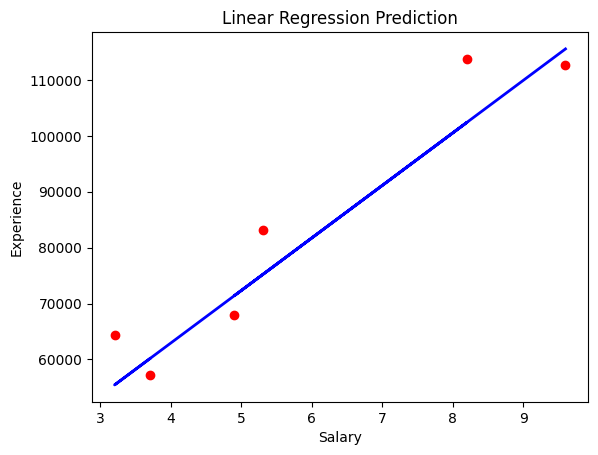

In [36]:
plt.scatter(X_test, Y_test, color='red', label='Actual Value')
plt.plot(X_test, y_predic, color='blue', linewidth=2, label='Predcted')
plt.title("Linear Regression Prediction")
plt.xlabel("Salary")
plt.ylabel("Experience")
plt.show()

### Prediction from Model

In [37]:
def salary_predict(experience):
    predicted_salary = model.predict(np.array([[experience]]))
    return predicted_salary[0]

In [40]:
experience = float(input("Enter Experience: "))
pred_salary = salary_predict(experience)
print("Predicted Salary is: ",pred_salary)

Enter Experience:  3


Predicted Salary is:  [53565.67322328]


/home/runner/workspace/.pythonlibs/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Model Accuracy in Machine Learning

In [41]:
accuracy = model.score(X_test,Y_test)
print("Acccuracy is ",accuracy)

Acccuracy is  0.9010930433795024


# Implement Linear regression for House prizing [homework]

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Load the dataset

In [54]:
df = pd.read_csv('/home/runner/workspace/notebooks/SC/Datasets/Housing.csv')
df.head()

,area,bedrooms,price
0,7420,4,13300000
1,8960,4,12250000
2,9960,3,12250000
3,7500,4,12215000
4,7420,4,11410000


### Split into features (X) and target (y)

In [55]:
X = df[['area', 'bedrooms']]
y = df['price']

### Split data into training and testing sets (80% train, 20% test)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create and train the model

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Make predictions

In [58]:
y_pred = model.predict(X_test)

In [59]:
y_pred

array([5721232.88463307, 5259089.65566028, 3605915.69248562,
       4675251.06046329, 4270456.3011267 , 5344719.31628917,
       6045325.63052557, 5367037.47021356, 3294535.10838055,
       3780031.88116123, 6764357.84138504, 3564657.7650917 ,
       3481363.45884359, 3935722.17321376, 4274348.55842802,
       4142011.81018336, 2811895.20301771, 5064476.79059462,
       5006092.93107492, 4368798.12354303, 4683035.57506591,
       5385588.01795296, 3453728.43200427, 4208180.18430569,
       5940234.68339011, 6605810.68191468, 3236151.24886086,
       3896799.60020062, 7866902.04754019, 3201120.93314904,
       4286025.33033196, 3943506.68781638, 5064476.79059462,
       5303850.61462538, 5283353.93823533, 4519560.76841075,
       4537465.1519968 , 4662538.89867585, 4083627.95066366,
       4509573.18673424, 5835143.73625465, 3446333.14313177,
       5227951.59724977, 4363870.47635822, 4660717.42114152,
       4324037.16457792, 5064476.79059462, 5230808.4646676 ,
       5166710.87031225,

### Plotting the Graph

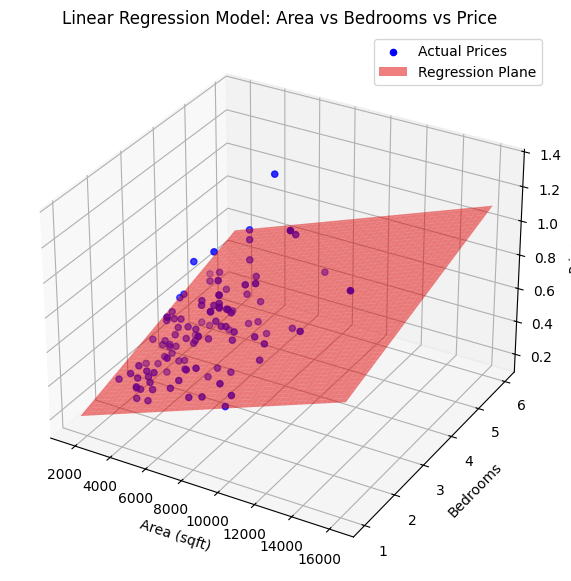

In [60]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['area'], X_test['bedrooms'], y_test, color='blue', label='Actual Prices')
x_surf = np.linspace(X['area'].min(), X['area'].max(), 100)
y_surf = np.linspace(X['bedrooms'].min(), X['bedrooms'].max(), 100)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = model.intercept_ + model.coef_[0] * x_surf + model.coef_[1] * y_surf
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5, label='Regression Plane')

# Set labels and title
ax.set_xlabel('Area (sqft)')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Linear Regression Model: Area vs Bedrooms vs Price')
ax.legend()
plt.show()

### Function to predict price

In [61]:
def predict_price(a,b):
   
    area,bedrooms = a,b
    
    features = [[area, bedrooms]]
    
    predicted_price = model.predict(features)
    
    print(f"\nEstimated price for a house with {area} sqft and {bedrooms} bedrooms: ₹{predicted_price[0]:.2f}")

### Call the function to predict price

In [63]:
area = float(input("Enter the area of the house (in sqft): "))
bedrooms = int(input("Enter the number of bedrooms: "))

predict_price(area,bedrooms)

Enter the area of the house (in sqft):  400000
Enter the number of bedrooms:  6



Estimated price for a house with 400000.0 sqft and 6 bedrooms: ₹160506450.46


/home/runner/workspace/.pythonlibs/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Calculate model accuracy metrics

In [64]:
mse = metrics.mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = metrics.r2_score(y_test, y_pred)  # R-squared

print("Model Accuracy Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model Accuracy Metrics:
Mean Squared Error (MSE): 3280176595474.01
Root Mean Squared Error (RMSE): 1811125.78
R-squared (R²): 0.35
